In [23]:
subscription_key = "19eab9a23bdb4c868d337a306f3ce503"
assert subscription_key

vision_base_url = "https://southeastasia.api.cognitive.microsoft.com/vision/v1.0/"
vision_analyze_url = vision_base_url + "analyze"
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"

import requests
headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
params   = {'visualFeatures': 'Categories,Description,Color'}
data     = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)


A group of people on a city street at night


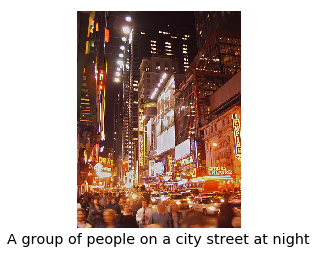

In [24]:
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)

In [35]:
celebrity_analyze_url = vision_base_url + "models/celebrities/analyze"
print(celebrity_analyze_url)
params_celeb   = {'model': 'celebrities'}

https://southeastasia.api.cognitive.microsoft.com/vision/v1.0/models/celebrities/analyze


In [41]:
image_path = "./pictures/1009461063551948232.jpg"
image_data = open(image_path, "rb").read()

headers  = {'Ocp-Apim-Subscription-Key': subscription_key,
            'Content-Type': 'application/octet-stream' }
params     = {'visualFeatures': 'Categories,Description,Color,Faces'}
response = requests.post(vision_analyze_url, headers=headers, params=params, data=image_data)
#response = requests.post(, headers=headers, params=params_celeb, data=image_data)
response.raise_for_status()

analysis = response.json()

In [46]:
import json
print(json.dumps(analysis, indent=2))

{
  "categories": [
    {
      "name": "others_",
      "score": 0.00390625
    },
    {
      "name": "outdoor_",
      "score": 0.0078125,
      "detail": {
        "landmarks": []
      }
    },
    {
      "name": "people_crowd",
      "score": 0.36328125,
      "detail": {
        "celebrities": []
      }
    }
  ],
  "description": {
    "tags": [
      "person",
      "photo",
      "building",
      "man",
      "outdoor",
      "suit",
      "front",
      "posing",
      "standing",
      "woman",
      "group",
      "sitting",
      "people",
      "bench",
      "bunch",
      "different",
      "wearing",
      "table",
      "boat",
      "old",
      "young",
      "cake",
      "large",
      "white",
      "holding",
      "statue",
      "wedding",
      "city",
      "display"
    ],
    "captions": [
      {
        "text": "a group of people posing for a photo in front of a building",
        "confidence": 0.9355570513936374
      }
    ]
  },
  "faces": [
    {

In [49]:
for each in analysis["faces"]:
    each["faceRectangle")

{'top': 459, 'left': 385, 'width': 34, 'height': 34}
{'top': 370, 'left': 137, 'width': 31, 'height': 31}
{'top': 457, 'left': 530, 'width': 27, 'height': 27}
{'top': 54, 'left': 188, 'width': 25, 'height': 25}
{'top': 129, 'left': 465, 'width': 24, 'height': 24}


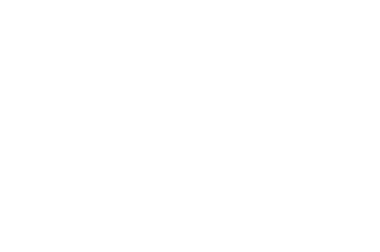

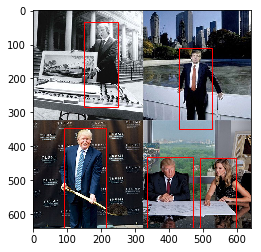

In [71]:
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.patches as patches
import matplotlib.pyplot as plt
image = Image.open(BytesIO(image_data))
plt.axis("off")
fig,ax = plt.subplots(1)
ax.imshow(image)

for each in analysis["faces"]:
    face = each["faceRectangle"]
    l = face["left"]
    t = face["top"]
    w = face["width"]
    w2 = w * 4
    l2 = l - (w2 - w)/2
    h = face["height"]
    h2 = h * 10
    t2 = t - h * 0.8
    ax.add_patch(patches.Rectangle((l2,t2),w2,h2,linewidth=1,edgecolor='r',facecolor='none'))